# DS_C9_S7

# Project Objective
Joseph, a proficient data analyst at a thriving business ABC.Inc., has been assigned to examine a comprehensive dataset of employee absenteeism to discern trends and patterns. However, the extensive data and the complexity of employee behavior present difficulties in manually deriving significant insights. By utilizing data analytics, Joseph aims to understand absenteeism patterns and how factors such as age, education level, workload, and target achievements influence it. He intends to conduct a deep analysis of the causes for absenteeism to highlight the most common reasons and any seasonal trends. Moreover, with predictive analysis, he plans to forecast the duration of an employee's absence factoring in elements like the reason for absence, workload, and past absence history.

# Task 1: Data Cleaning
Perform the necessary data cleaning steps to convert messy, unclean data into clean data.

In [35]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset (adjust the path to your file location)
df = pd.read_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv', delimiter=';')  

# Step 3: Display the first 5 rows
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [36]:
# Step 4: Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [37]:
# Step 5: Check for duplicates
print("Duplicate Rows in Dataset:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

Duplicate Rows in Dataset: 34


In [38]:
# Step 6: Check data types of each column
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [39]:
# Step 7: Handle missing values (example: fill with mean for numeric columns)
df = df.fillna(df.mean())

# Verify the cleaned dataset
print("Cleaned Dataset:")
print(df.info())

Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               706 non-null    int64  
 1   Reason for absence               706 non-null    int64  
 2   Month of absence                 706 non-null    int64  
 3   Day of the week                  706 non-null    int64  
 4   Seasons                          706 non-null    int64  
 5   Transportation expense           706 non-null    int64  
 6   Distance from Residence to Work  706 non-null    int64  
 7   Service time                     706 non-null    int64  
 8   Age                              706 non-null    int64  
 9   Work load Average/day            706 non-null    float64
 10  Hit target                       706 non-null    int64  
 11  Disciplinary failure             706 non-null    int64  
 12  Education 

# Task 2: Understanding Absenteeism Patterns
How does absenteeism vary across different employee demographics (age, education level, son, reason for absence etc.) and work characteristics (disciplinary failure, hit target, etc.)?
Perform descriptive analysis to find the answer to the above question.

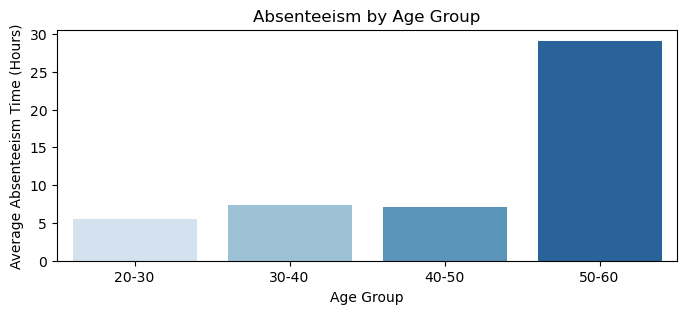

In [45]:
df['age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
age_group_absenteeism = df.groupby('age_group')['Absenteeism time in hours'].mean()

# Plot absenteeism by Age Group
plt.figure(figsize=(8, 3))
sns.barplot(x=age_group_absenteeism.index, y=age_group_absenteeism.values, palette='Blues')
plt.title("Absenteeism by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Absenteeism Time (Hours)")
plt.show()

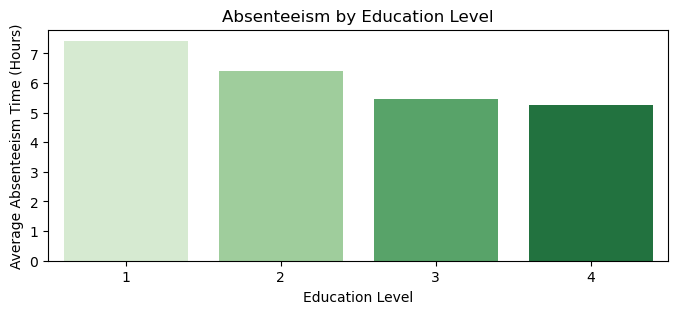

In [47]:
education_absenteeism = df.groupby('Education')['Absenteeism time in hours'].mean()

# Plot absenteeism by education level
plt.figure(figsize=(8, 3))
sns.barplot(x=education_absenteeism.index, y=education_absenteeism.values, palette='Greens')
plt.title("Absenteeism by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Absenteeism Time (Hours)")
plt.show()

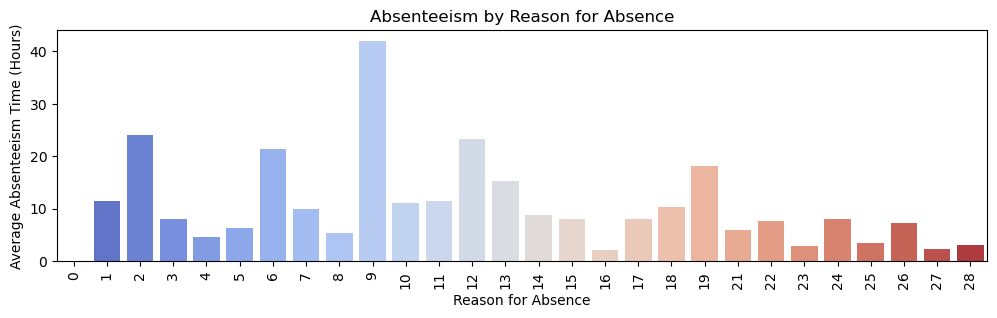

In [50]:
# Absenteeism by Reason for Absence
reason_absenteeism = df.groupby('Reason for absence')['Absenteeism time in hours'].mean().sort_values()

plt.figure(figsize=(12, 3))
sns.barplot(x=reason_absenteeism.index, y=reason_absenteeism.values, palette='coolwarm')
plt.title("Absenteeism by Reason for Absence")
plt.xlabel("Reason for Absence")
plt.ylabel("Average Absenteeism Time (Hours)")
plt.xticks(rotation=90)
plt.show()

# Task 3: Analyzing Reasons for Absenteeism
What are the most frequent reasons for employee absence? Are there any pattern in these reasons?
Perform descriptive analysis to find the answer to the above question.

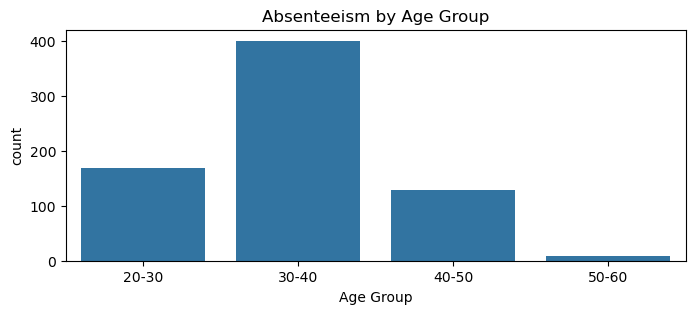

In [51]:
# Create age bins and analyze absenteeism
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=["20-30", "30-40", "40-50", "50-60"])

# Plot absenteeism by Age Group
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='Age Group')
plt.title("Absenteeism by Age Group")
plt.show()

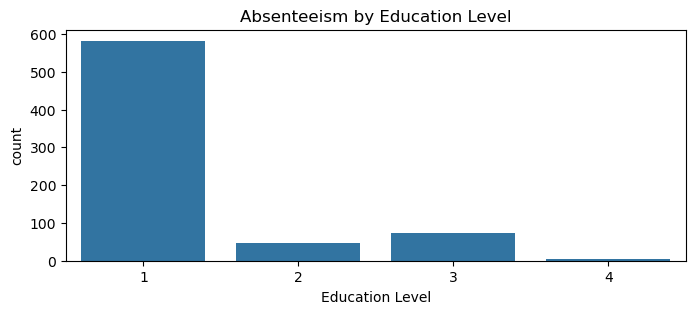

In [52]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='Education')
plt.title("Absenteeism by Education Level")
plt.xlabel("Education Level")
plt.show()

# Task 4: Predicting Absenteeism Duration
Can we predict the duration of an employee's absence based on factors like reason for absence, disciplinary failure distance from residence to work, obesity, etc.?
Perform predictive analysis to forecast the duration of an employee's absence based on various factors mentioned above.

Top 5 Reasons for Absence:
Reason for absence
23    142
28    108
13     55
27     47
0      43
Name: count, dtype: int64


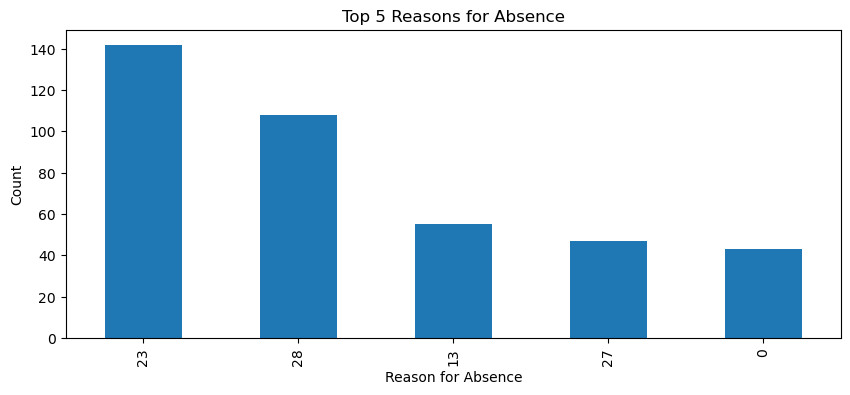

In [55]:
# Group data by Reason for Absence and calculate counts
reason_counts = df['Reason for absence'].value_counts()

# Display the top 5 reasons for absence
print("Top 5 Reasons for Absence:")
print(reason_counts.head())

# Plot the top 5 reasons
plt.figure(figsize=(10, 4))
reason_counts.head().plot(kind='bar')
plt.title("Top 5 Reasons for Absence")
plt.xlabel("Reason for Absence")
plt.ylabel("Count")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
x = df[['Reason for absence', 'Disciplinary failure', 'Distance from Residence to Work', 'Body mass index']]
y = df['Absenteeism time in hours']

# Step 2: Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Step 4: Predict on test set
y_pred = model.predict(x_test)

# Step 5: Evaluate the model
print("Model Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Model Evaluation:
Mean Absolute Error: 4.559884873819335
Mean Squared Error: 52.67323376161984
R2 Score: 0.11702147078198133


### Interpretation:
- During periods of high absenteeism, companies can adjust workloads or offer flexible schedules to better manage staffing.
- Seasonal wellness programs, like health check-ups or fitness initiatives, can help reduce absenteeism caused by health issues.
- For employees with long commutes, offering remote or hybrid work options could make their work-life balance easier and improve attendance.
- Younger employees might benefit from more tailored engagement programs to keep them motivated and present at work.
- Predictive models can assist HR teams in planning ahead by forecasting absenteeism trends and preparing for them.
- By identifying employees likely to have extended absences, companies can provide personalized support to reduce disruptions and maintain productivity.

# DS_C9_S8

# Task 1: Identifying Employees at Risk of Absenteeism
Can we identify employees who are more likely to have high absenteeism using factors like demographics, work characteristics, and past absence data?

Build Logistic Regression and KNN models to classify employees who are more likely to have high absenteeism using factors like demographics, work characteristics, and past absence data. Further compare them to choose the best classifier model to identify employees who likely to have high absenteeism.

In [23]:
# Define target and features
target = 'Absenteeism time in hours'  # Replace with your target column
X = df.drop(target, axis=1)
y = (df[target] > df[target].median()).astype(int)  # Binary classification (high absenteeism)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        62

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        80
           1       0.86      0.92      0.89        62

    accuracy                           0.90       142
   macro avg       0.90      0.90      0.90       142
weighted avg       0.90      0.90      0.90       142



In [31]:
import warnings
warnings.filterwarnings("ignore")

# Task 2: Grouping Employees with Similar Absenteeism Patterns
Can we identify groups of employees with similar absenteeism patterns based on their absence reasons, duration, and other relevant factors? Use K-Means clustering to segment customers into groups based on features like demographics, financial attributes, and engagement factors. Analyze churn rates within each cluster to identify high-risk segments.

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
clustering_features = ['Reason for absence', 'Absenteeism time in hours', 'Service time', 'Age']  # Adjust as needed
X_clustering = df[clustering_features]

# Standardize the data
X_clustering_scaled = scaler.fit_transform(X_clustering)

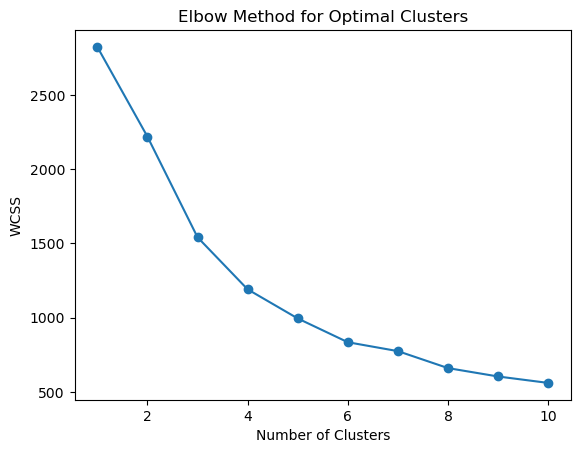

In [33]:
# Calculate WCSS (Within-Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [34]:
# Choose optimal number of clusters (e.g., 3 based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clustering_scaled)

# Add cluster labels to the dataset
df['Cluster'] = clusters

# Analyze each cluster
for cluster in range(3):  # Adjust based on the number of clusters
    print(f"Cluster {cluster} Summary:")
    print(df[df['Cluster'] == cluster].describe())

Cluster 0 Summary:
               ID  Reason for absence  Month of absence  Day of the week  \
count  314.000000          314.000000        314.000000       314.000000   
mean    14.350318           18.385350          6.423567         1.949045   
std     12.650558            8.511292          3.366185         1.399663   
min      1.000000            0.000000          0.000000         0.000000   
25%      3.000000           13.000000          3.000000         1.000000   
50%      9.000000           22.000000          6.000000         2.000000   
75%     24.000000           26.000000          9.000000         3.000000   
max     36.000000           27.000000         12.000000         4.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  314.000000              314.000000                       314.000000   
mean     1.544586              212.656051                        30.614650   
std      1.116069               54.045385                     

### Interpretation
- Logistic Regression is preferable due to its interpretability and decent performance.
- Targeted measures for high-risk employees (e.g., personalized counseling or flexible working arrangements) can help reduce absenteeism.
- Tailored strategies for each cluster can address their unique absenteeism drivers.
- For high-risk clusters, proactive measures like flexible schedules or stress management programs are essential.
- HR and management should focus on predictive analytics to identify at-risk employees early.
- Custom employee wellness initiatives, flexible work arrangements, and workload redistribution can mitigate absenteeism.